# How to use GCRCatalogs

by Yao-Yuan Mao

Links to GitHub code repos: [GCRCatalogs](https://github.com/LSSTDESC/gcr-catalogs) and [GCR](https://github.com/yymao/generic-catalog-reader)

**Note: You should be running this notebook at https://jupyter-dev.nersc.gov **

In [1]:
## adding DESCQA env

import sys
sys.path.insert(0, '/global/homes/j/jderose/desi/mocks/desiqa/cori/lib/python3.5/site-packages/')

## Note: if you clone the gcr-catalogs repo and are running this under the `examples` folder,
## you can also add your version of GCRCatalogs:
#sys.path.insert(0, '..')

## The following lines are to check if you're in the lsst group
import subprocess
assert u'desi' in subprocess.check_output(['groups']).decode().split(), 'You need to be in the `desi` group for this notebook to work'

## The basics:

- `get_available_catalogs()` lists available catlaogs; returns `dict`.
- `load_catalog()` loads the catalog you want; returns an instance of `GCR.BaseGenericCatalog`

In [43]:
import GCRCatalogs

## check version
print('GCRCatalogs =', GCRCatalogs.__version__, '|' ,'GCR =', GCRCatalogs.GCR.__version__)

GCRCatalogs = 0.6.6 | GCR = 0.6.1


In [44]:
## list all find available catlaogs, sorted by their name

print('\n'.join(sorted(GCRCatalogs.get_available_catalogs())))

buzzard
buzzard_high-res
buzzard_test


In [4]:
## load 'buzzard' catalog

gc = GCRCatalogs.load_catalog('buzzard_test')

## GCR interface

See also the [full GCR API Documentation](https://yymao.github.io/generic-catalog-reader/index.html).

### quantities

- `get_quantities()` loads the quantities you need; takes a `list` and returns `dict`.
- `has_quantity()` and `has_quantities()` can check if the quantities you need exist; both return `bool`.
- `list_all_quantities()` lists all available catlaogs; returns `list`.

In [5]:
print(', '.join(gc.list_all_quantities()))

magerr_Y_des, velocity_z, redshift_true, mag_true_W1_wise, is_central, Mag_true_z_des_z01, position_x, Mag_true_W2_wise_z01, mag_lensed_W2_wise, galaxy_id, mag_Y_des, dec_true, ellipticity_1_true, mag_true_W4_wise, Mag_true_i_des_z01, mag_lensed_W1_wise, mag_g_des, shear_1, Mag_true_r_des_z01, velocity_y, magerr_z_des, Mag_true_W1_wise_z01, position_y, Mag_true_W3_wise_z01, ra_true, mag_r_des, position_z, ellipticity_1, ellipticity_2, ellipticity_2_true, magerr_r_des, convergence, Mag_true_g_des_z01, mag_i_des, dec, redshift, mag_lensed_W4_wise, size, mag_true_W3_wise, mag_z_des, velocity_x, magerr_i_des, Mag_true_Y_des_z01, size_true, magerr_g_des, Mag_true_W4_wise_z01, shear_2, magnification, halo_mass, mag_lensed_W3_wise, halo_id, mag_true_W2_wise, ra


In [6]:
gc.get_quantities(['mag_g_des', 'ra', 'dec'])

{'dec': array([ 5070.44581771,  5070.44096702,  5070.44536996, ...,  5071.69091018,
         5073.0937116 ,  5073.14808989]),
 'mag_g_des': array([ 23.56345367,  21.20425224,  24.8347168 , ...,  24.19458199,
         24.38895798,  24.07577705], dtype=float32),
 'ra': array([ 221.7452088 ,  221.74582649,  221.74894922, ...,  230.27953815,
         228.63716694,  228.57528929])}

In [7]:
gc.has_quantity('mag_g_des')

True

In [8]:
gc.has_quantities(['mag_u_des', 'ra', 'dec'])

False

In [9]:
## Only returns `True` if *all* quantities exist
gc.has_quantities(['mag_u_des', 'ra', 'dec', 'quantitiy_that_does_not_exist'])

False

### accessing native quantities

Native quantities are quantities that have not yet be homogenized (to common labels/units).
However, you can still access them as long as you know what you are doing. 

In [21]:
## print out the first 5 native quantities

print('\n'.join(sorted(gc.list_all_native_quantities()[:5])))

truth/AMAG/0
truth/AMAG/3
truth/COEFFS/1
truth/LMAG/1
truth/OMAGERR/3


In [23]:
gc.get_quantities(['truth/AMAG/0',
                   'truth/AMAG/3'])

{'truth/AMAG/0': array([-17.52243805, -19.7017498 , -16.09822083, ..., -22.04293251,
        -22.15708351, -21.49083138], dtype=float32),
 'truth/AMAG/3': array([-18.46500778, -20.53603554, -16.91502953, ..., -23.03385925,
        -23.10215187, -22.05506897], dtype=float32)}

You can also rename the native quantities by using `add_quantity_modifier()`. For example:

In [24]:
gc.add_quantity_modifier('kcorrect_coefficient_0', 'truth/COEFFS/0')
gc.get_quantities(['kcorrect_coefficient_0'])

{'kcorrect_coefficient_0': array([  8.99252825e-11,   4.97986186e-08,   1.03537223e-08, ...,
          1.39733611e-08,   2.12505622e-08,   7.42585682e-09], dtype=float32)}

To get all native quantities that match a regex

In [25]:
import re

data = gc.get_quantities([q for q in gc.list_all_native_quantities() if re.match('truth/COEFFS/\d+', q)]) 

In [26]:
data

{'truth/COEFFS/0': array([  8.99252825e-11,   4.97986186e-08,   1.03537223e-08, ...,
          1.39733611e-08,   2.12505622e-08,   7.42585682e-09], dtype=float32),
 'truth/COEFFS/1': array([  3.03820588e-14,   9.51125029e-13,   4.10002240e-12, ...,
          2.00311764e-11,   2.10052149e-11,   2.74345338e-11], dtype=float32),
 'truth/COEFFS/2': array([  1.70871992e-08,   6.96106994e-08,   4.97552888e-09, ...,
          9.12624465e-09,   1.32643105e-08,   6.83267087e-09], dtype=float32),
 'truth/COEFFS/3': array([  1.30903530e-07,   6.99592306e-07,   5.60194291e-09, ...,
          1.02744025e-07,   7.80981537e-08,   6.90286539e-09], dtype=float32),
 'truth/COEFFS/4': array([  4.34666259e-09,   7.74487035e-08,   1.75365167e-09, ...,
          3.67368092e-09,   3.16706861e-09,   1.21139365e-09], dtype=float32)}

### more info about the catalog

- `lightcone` is a `bool`
- `cosmology` is a instance of `astropy.cosmology.FLRW`
- `get_input_kwargs()` returns a `dict` (when no argument) from the orignal yaml config file. 
  If a argument if passed, it returns the corresponding value for key=argument

In [27]:
gc.lightcone

True

In [28]:
gc.cosmology

FlatLambdaCDM(H0=70 km / (Mpc s), Om0=0.286, Tcmb0=2.725 K, Neff=3.04, m_nu=[ 0.  0.  0.] eV, Ob0=None)

In [29]:
print(gc.get_catalog_info('description'))

This is a smaller version of the Buzzard galaxy catalog v1.6 (realization 0),
with only one healpixel, for testing purposes.



In [30]:
print(gc.get_catalog_info('version'))

None


In [31]:
print(gc.get_catalog_info())

{'halo_mass_def': 'vir', 'description': 'This is a smaller version of the Buzzard galaxy catalog v1.6 (realization 0),\nwith only one healpixel, for testing purposes.\n', 'catalog_root_dir': '/project/projectdirs/desi/mocks/buzzard/buzzard_v1.6_desicut/temp/', 'sky_area': 53.71, 'catalog_path_template': {'truth': '{group}/{pix}/Buzzard_v1.6_lensed-8-{pix}.fits'}, 'creators': ['Joe DeRose', 'Risa Wechsler', 'Eli Rykoff', 'Matt Becker'], 'healpix_pixels': [128], 'subclass_name': 'buzzard.BuzzardGalaxyCatalog', 'lightcone': True, 'cosmology': {'Om0': 0.286, 'H0': 70.0}}


### more tips on using the quantities

#### tip 1
`get_quantities()` returns a dictionary, which you can easily turn into a `astropy.table.Table` or `pandas.DataFrame`

In [32]:
data = gc.get_quantities(['mag_g_des', 'ra', 'dec'])

In [33]:
import pandas as pd
pd.DataFrame(data)

,dec,mag_g_des,ra
0,5070.445818,23.563454,221.745209
1,5070.440967,21.204252,221.745826
2,5070.445370,24.834717,221.748949
3,5070.440403,22.417755,221.747757
4,5074.114874,24.906065,223.650718
5,5074.113296,20.587118,223.651473
6,5070.442412,24.060648,221.741501
7,5070.443919,25.392254,221.740025
8,5070.446223,24.513468,221.752858
9,5074.111391,24.395870,223.648755


In [34]:
from astropy.table import Table
Table(data)

ra,mag_g_des,dec
float64,float32,float64
221.745208798,23.5635,5070.44581771
221.745826489,21.2043,5070.44096702
221.748949216,24.8347,5070.44536996
221.747756585,22.4178,5070.44040345
223.650717552,24.9061,5074.11487354
223.651473202,20.5871,5074.11329566
221.741501268,24.0606,5070.44241151
221.740024574,25.3923,5070.44391893
221.75285791,24.5135,5070.44622333


#### tip 2

Sometimes you can allow slightly different quantiies (for example, lsst u band and sdss u band) when comparing different catalogs. In this case, you can use `first_available()` to get the first available of the given catalog.

In [36]:
gc.first_available('mag_g_des', 'mag_u_sdss', 'mag_u_lsst')

'mag_g_des'

### Here's a full example

In [38]:
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
catalogs = ('buzzard_test',)
gc_all = dict(zip(catalogs, (GCRCatalogs.load_catalog(c) for c in catalogs)))

/global/common/cori/contrib/desi/desiconda/20170613-1.1.4-spectro/code/desiconda/20170613-1.1.4-spectro_conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


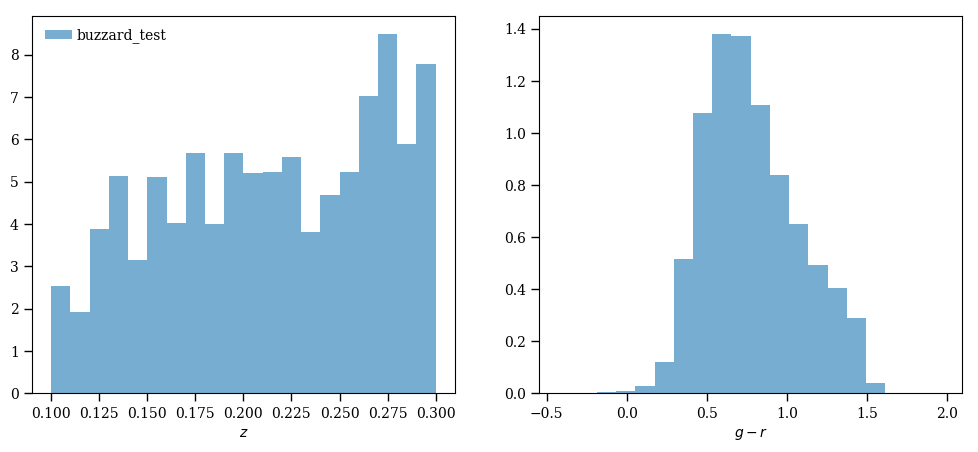

In [41]:
fig, ax = plt.subplots(ncols=2, figsize=(12,5), dpi=100)

for label, gc_this in gc_all.items():
    mag_g = gc_this.first_available('mag_g_des', 'mag_g_sdss')
    mag_r = gc_this.first_available('mag_r_des', 'mag_r_sdss')
    redshift = gc_this.first_available('redshift_true', 'redshift')
    quantities_needed = [mag_g, mag_r, redshift]
    
    data = Table(gc_this.get_quantities(quantities_needed, [redshift + '> 0.1', redshift + '< 0.3']))
    
    data = data[np.isfinite(data[mag_g]) & np.isfinite(data[mag_r])]
    data = data[data[mag_r] < 22.0]
    
    ax[0].hist(data[redshift], 20, normed=True, alpha=0.6, label=label);
    ax[1].hist(data[mag_g] - data[mag_r], 20, normed=True, alpha=0.6);

ax[0].legend(frameon=False);
ax[0].set_xlabel('$z$');
ax[1].set_xlabel('$g-r$');